# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [8]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 575


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [10]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"# YOUR CODE HERE

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    # YOUR CODE HERE
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()# YOUR CODE HERE

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]# YOUR CODE HERE
        city_lng = city_weather["coord"]["lon"]# YOUR CODE HERE
        city_max_temp = city_weather["main"]["temp_max"]# YOUR CODE HERE
        city_humidity = city_weather["main"]["humidity"]# YOUR CODE HERE
        city_clouds = city_weather["clouds"]["all"]# YOUR CODE HERE
        city_wind = city_weather["wind"]["speed"]# YOUR CODE HERE
        city_country = city_weather["sys"]["country"]# YOUR CODE HERE
        city_date = city_date["dt"] # YOUR CODE HERE

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | la pointe rouge
City not found. Skipping...
Processing Record 2 of Set 1 | blackmans bay
City not found. Skipping...
Processing Record 3 of Set 1 | vorgashor
City not found. Skipping...
Processing Record 4 of Set 1 | banda
City not found. Skipping...
Processing Record 5 of Set 1 | cidreira
City not found. Skipping...
Processing Record 6 of Set 1 | soio
City not found. Skipping...
Processing Record 7 of Set 1 | hawaiian paradise park
City not found. Skipping...
Processing Record 8 of Set 1 | edinburgh of the seven seas
City not found. Skipping...
Processing Record 9 of Set 1 | olonkinbyen
City not found. Skipping...
Processing Record 10 of Set 1 | iqaluit
City not found. Skipping...
Processing Record 11 of Set 1 | jaisalmer
City not found. Skipping...
Processing Record 12 of Set 1 | taiohae
City not found. Skipping...
Processing Record 13 of Set 1 | rio preto da eva
City not found. Skipping...
Pro

In [72]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data) # YOUR CODE HERE

# Show Record Count
city_data_df.count()

Series([], dtype: int64)

In [71]:
# Display sample data
city_data_df.head()

""


In [25]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [26]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,belo sur tsiribihina,-19.7000,44.5500,27.84,77,49,1.02,MG,['dt']
1,mata-utu,-13.2816,-176.1745,28.04,76,100,6.21,WF,['dt']
2,port lincoln,-34.7333,135.8667,15.88,96,100,6.39,AU,['dt']
3,port mathurin,-19.6833,63.4167,26.26,76,74,3.57,MU,['dt']
4,ancud,-41.8697,-73.8203,14.83,75,100,4.66,CL,['dt']


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

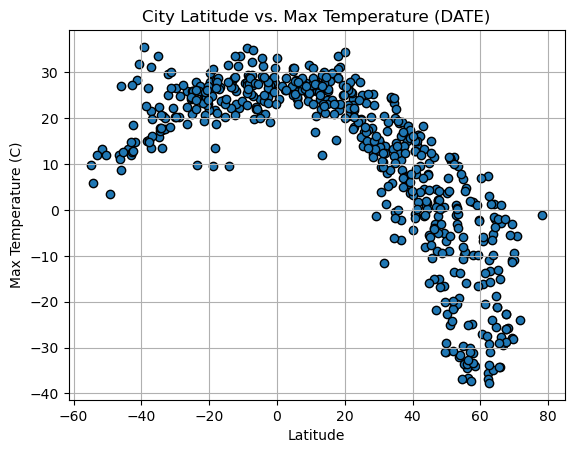

In [40]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties # YOUR CODE HERE
plt.title("City Latitude vs. Max Temperature (DATE)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

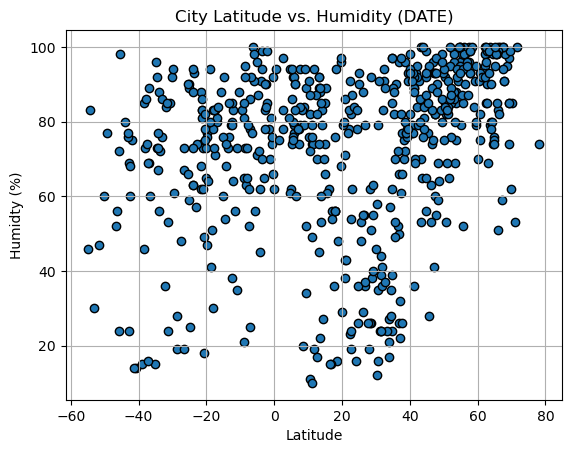

In [39]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (DATE)")
plt.xlabel("Latitude")
plt.ylabel("Humidty (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

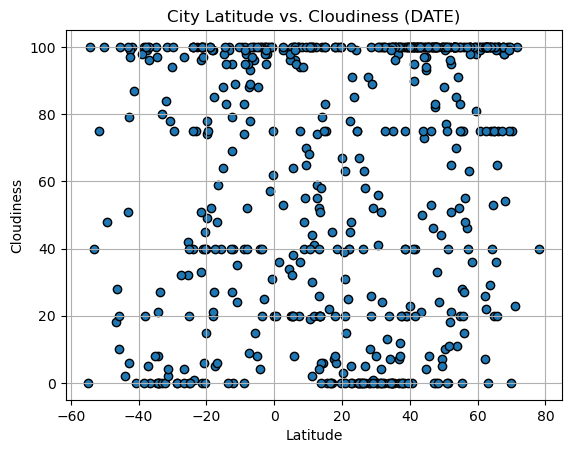

In [38]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (DATE)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

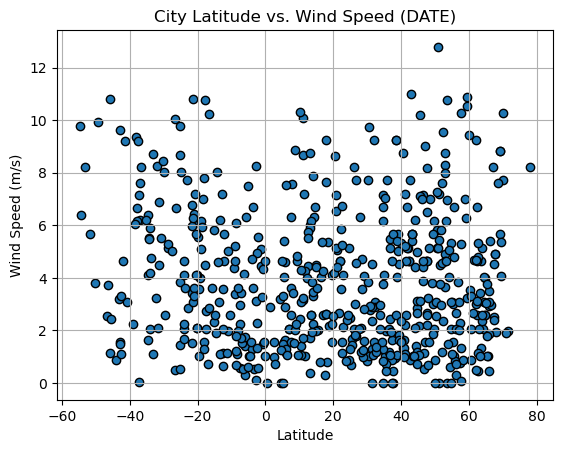

In [37]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (DATE)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [59]:
# Define a function to create Linear Regression plots
def lin_regress(x_vals, y_vals, y_label):
    (slope, intercept, rval, pval, stderr) = linregress(x_vals, y_vals)

    regress_vals = x_vals * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plotting best fit line 
    plt.scatter(x_vals, y_vals)
    plt.plot(x_vals,regress_vals,"r-")
    # Write down the what the line equation is
    plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

    plt.xlabel(f"Latitude")
    plt.ylabel(f"{y_label}")
    print(f"The r-value is: {rval}")
    plt.show()


In [44]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,isafjordur,66.0755,-23.1240,-2.90,83,100,2.92,IS,['dt']
6,bakanas,44.8081,76.2772,-5.57,56,100,2.85,KZ,['dt']
7,coahuayana de hidalgo,18.7000,-103.6583,31.11,48,100,2.16,MX,['dt']
9,la ronge,55.1001,-105.2842,-9.88,79,75,3.09,CA,['dt']
10,murudeshwara,14.0943,74.4845,26.58,79,100,2.24,IN,['dt']


In [47]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,belo sur tsiribihina,-19.7000,44.5500,27.84,77,49,1.02,MG,['dt']
1,mata-utu,-13.2816,-176.1745,28.04,76,100,6.21,WF,['dt']
2,port lincoln,-34.7333,135.8667,15.88,96,100,6.39,AU,['dt']
3,port mathurin,-19.6833,63.4167,26.26,76,74,3.57,MU,['dt']
4,ancud,-41.8697,-73.8203,14.83,75,100,4.66,CL,['dt']
8,adamstown,-25.0660,-130.1015,20.90,59,0,3.83,PN,['dt']
11,hithadhoo,-0.6000,73.0833,27.75,74,100,1.48,MV,['dt']
12,formosa do rio preto,-11.0483,-45.1931,33.65,35,35,1.98,BR,['dt']
13,papatowai,-46.5619,169.4708,12.01,52,18,2.56,NZ,['dt']


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7161472181434118


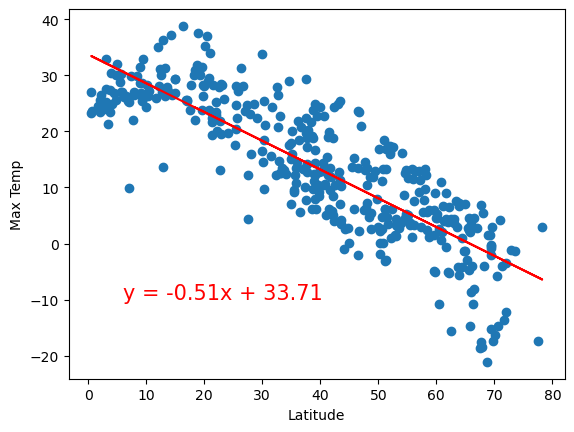

In [15]:
# Linear regression on Northern Hemisphere
lin_regress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Max Temp")

The r-value is: 0.5760148249702262


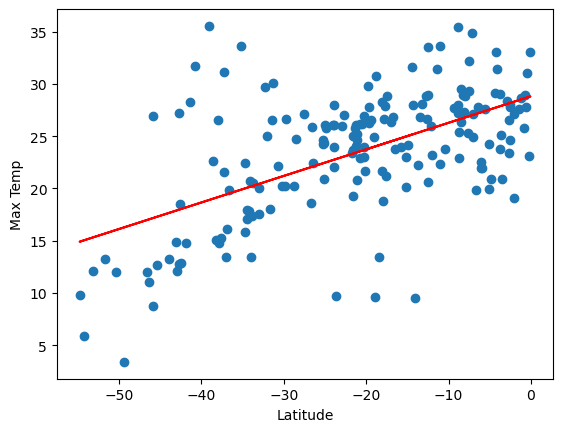

In [61]:
# Linear regression on Southern Hemisphere
lin_regress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Max Temp")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.3550543805730102


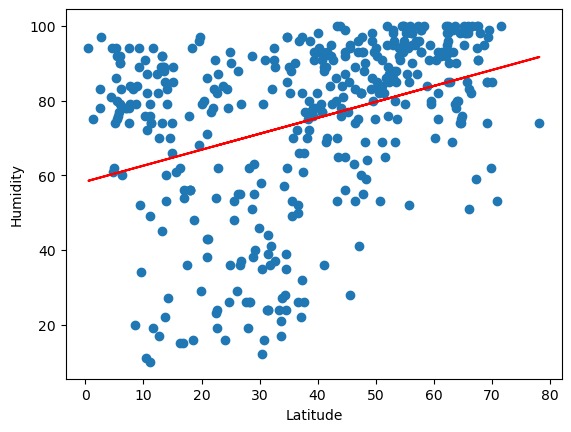

In [62]:
# Northern Hemisphere
lin_regress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Humidity")

The r-value is: 0.2881051911646598


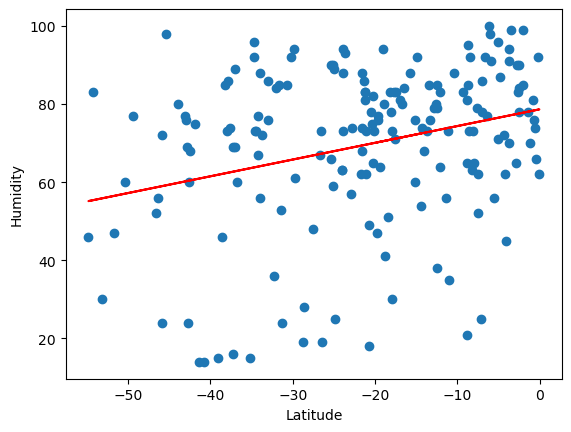

In [63]:
# Southern Hemisphere
lin_regress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Humidity")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.24967056240237395


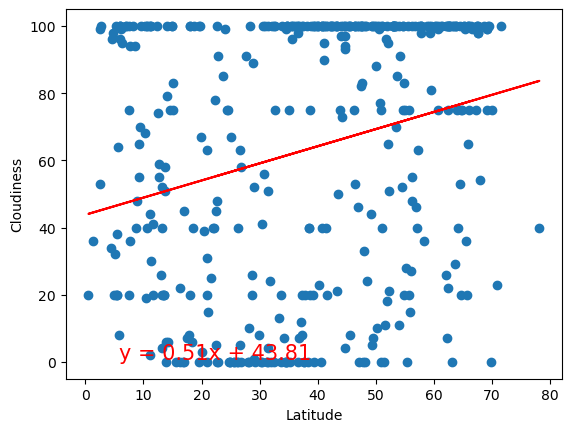

In [64]:
# Northern Hemisphere
lin_regress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Cloudiness")

The r-value is: 0.20419092669356945


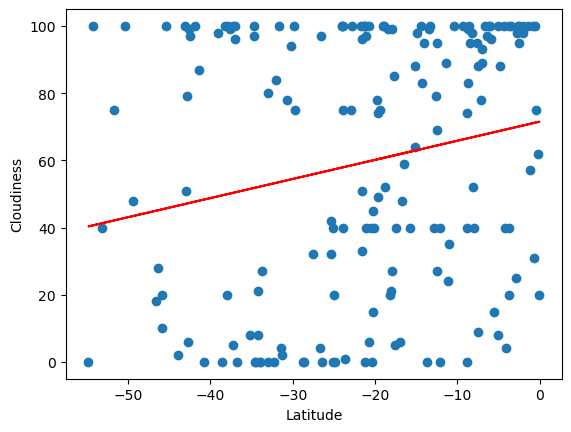

In [65]:
# Southern Hemisphere
lin_regress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Cloudiness")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.09396247334363347


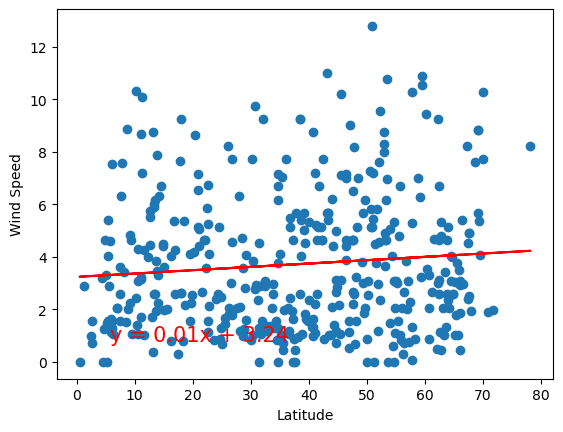

In [67]:
# Northern Hemisphere
lin_regress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Wind Speed")

The r-value is: -0.32791015584000743


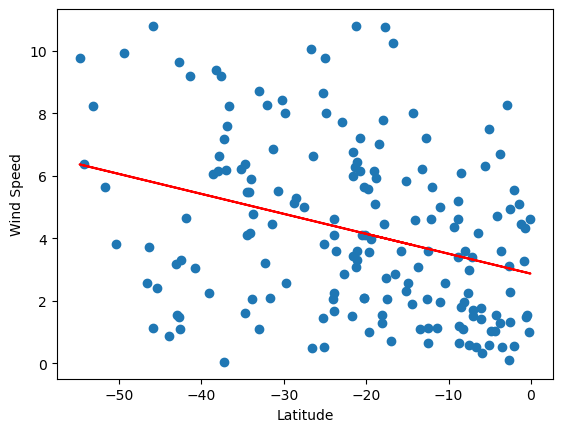

In [68]:
# Southern Hemisphere
lin_regress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Wind Speed")

**Discussion about the linear relationship:** YOUR RESPONSE HERE